## 데이터 시각화
1. 꺾은 선 그래프
2. 산점도 그래프
3. 막대 그래프
4. 파이 그래프
5. 상자 수염 그래프
6. 히스토그램

### 0. matplotlib
- import
    - import matplotlib
    - import matplotlib.pyplot as plt
- 관련 함수
    - axhline() : y축 좌표
    - axvline() : x축 좌표
    - grid(boolean) : 그리드를 표시할 지 boolean값으로 결정
    - rcdefaults() : 초기값으로 되돌림
    - show() : 보여주기
    - title() : 그래프의 제목 지정
    - xlabel(str) : x축에 라벨 설정
    - xlim([하한값, 상한값]) : x축에 상/하한값 결정
    - xticks(list) : x축의 눈금 라벨에 대한 개수
    - ylabel(str) : y축의 라벨 설정
    - ylim([하한값, 상한값]) : y축에 상/하한값 결정
    - yticks(list) : y축 눈금 라벨에 대한 개수
- plt.savefig() : 그래프를 파일로 저장
    - frame : 파일경로
    - dpi : 해상도
    - format : 파일 포맷
    - facecolor, edge color : 서브 플롯 바깥 배경 색상
    - bbox_inches : 저장할 부분 지정
- 그래프 종류
    - 일변량
        - 연속형
            - 히스토그램(histogram)
            - 상자 수염 그래프(boxplot)
            - 바이올린 그래프(violin)
            - 커널 밀도 그래프(kernel density curve)
        - 범주형
            - 막대 그래프(bar chart)
            - 파이 그래프(pie chart)
    - 다변량
        - 연속형
            - 산점도(scatter plot)
            - 선 그래프(line)
            - 시계열 그래프(time-series)
        - 범주형
            - 모자이크 그래프(mosaic graph)
            - Tree Map 그래프

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# 폰트
plt.rc('font', family = 'AppleGothic')

# 그래프를 이미지로 저장할 때
cnt, PNG, UNDERBAR = 0, '.png', '_'

### 1. 꺾은 선 그래프
- 시간에 따른 **데이터의 연속적인 변화량** 관찰할 때
- 증가와 감소 상태 쉽게 찾을 수 있음

In [4]:
# data load

data1 = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col = '국가')
print(data1)

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512


In [6]:
# data columns

print(data1.columns)

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')


#### 하나의 값

In [28]:
# chart data - 하나의 값
chart_data1 = data1['4월06일']
print(chart_data1)

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64


Text(0.5, 1.0, '4월 6일 코로나 발생 건수')

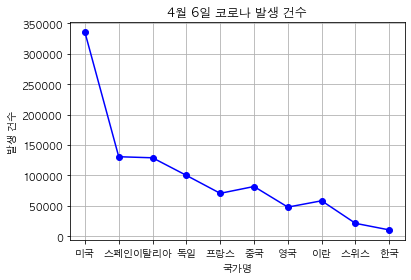

In [30]:
# Y축 눈금에 그려질 간격
YTICKS_INTERVAL = 50000

# 최대 눈금의 값 설정 - 올림
maxlim = (int(chart_data1.max()) / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL

# broken line chart
plt.plot(chart_data1, color = 'blue', linestyle = 'solid', marker = 'o')

# ytick
values = np.arange(0,  maxlim + 1, YTICKS_INTERVAL)
plt.yticks(values)

# grid
plt.grid(True)

# X label
plt.xlabel('국가명')

# Y label
plt.ylabel('발생 건수')

# 제목
plt.title('4월 6일 코로나 발생 건수')

#### 여러개의 값

In [39]:
# chart data load
print(data1)
data2 = data1.loc[['스페인', '프랑스', '독일', '중국', '영국', '이란'], ['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']]

# 전치
chart_data2 = data2.T
print(chart_data2)
print(chart_data2.columns)

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
국가        스페인    프랑스      독일     중국     영국     이란
4월06일  130709  70478  100024  81708  47806  58226
4월07일  135032  74390  102453  81740  51608  60500
4월08일  140510  78167  107591  81802  55242  62589
4월09일  146690  82048  112113  81865  60733  64586
4월10일  152446  863

Text(0.5, 1.0, '일자별 국가명 꺾은 선')

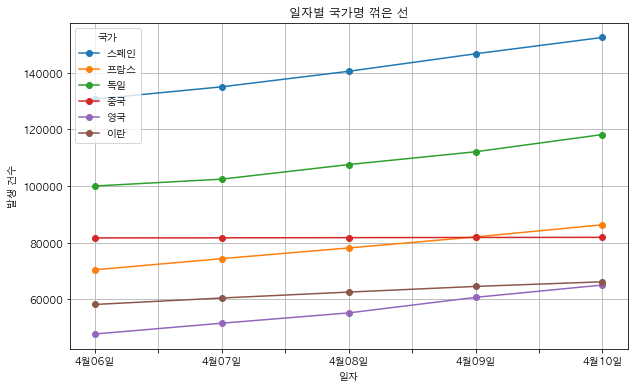

In [40]:
# draw graph

## figsize : 생성될 그래프의 크기, rot : 눈금 이름을 회전시킬 각도
chart_data2.plot(title = 'SomeTitle', figsize = (10, 6), legend = True, marker = 'o', rot = 0)

# grid
plt.grid(True)

# x label
plt.xlabel('일자')

# y label
plt.ylabel('발생 건수')

# 제목
plt.title('일자별 국가명 꺾은 선')

#### 이중축
- y가 이중축 : 주축 1개 / 보조축 1개

In [52]:
# data load

data3 = pd.read_csv('../data/tips.csv')
print(data3)

print(data3.info())

print(data3.describe())

     Unnamed: 0  total_bill   tip     sex smoker   day    time  size
0             0       16.99  1.01  Female     No   Sun  Dinner     2
1             1       10.34  1.66    Male     No   Sun  Dinner     3
2             2       21.01  3.50    Male     No   Sun  Dinner     3
3             3       23.68  3.31    Male     No   Sun  Dinner     2
4             4       24.59  3.61  Female     No   Sun  Dinner     4
..          ...         ...   ...     ...    ...   ...     ...   ...
239         239       29.03  5.92    Male     No   Sat  Dinner     3
240         240       27.18  2.00  Female    Yes   Sat  Dinner     2
241         241       22.67  2.00    Male    Yes   Sat  Dinner     2
242         242       17.82  1.75    Male     No   Sat  Dinner     2
243         243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---

In [43]:
# 결제 금액과 팁만 사용

data_bill = data3.loc[range(100), ['total_bill']]
data_tip = data3.loc[range(100), ['tip']]
print(data_bill)
print(data_tip)

    total_bill
0        16.99
1        10.34
2        21.01
3        23.68
4        24.59
..         ...
95       40.17
96       27.28
97       12.03
98       21.01
99       12.46

[100 rows x 1 columns]
     tip
0   1.01
1   1.66
2   3.50
3   3.31
4   3.61
..   ...
95  4.73
96  4.00
97  1.50
98  3.00
99  1.50

[100 rows x 1 columns]


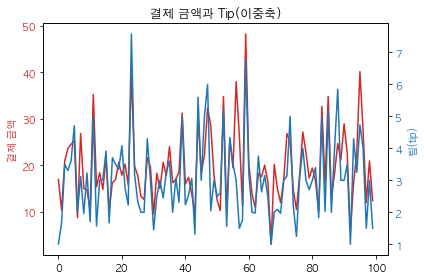

In [65]:
# draw plot
## axis 1
## 1. plot 선언
fig, ax1 = plt.subplots() # .subplots()의 형이 튜플이므로 fig는 저장하기 위해
# print(plt.subplots())

## 2. 제목 등 선택
ax1.set_title('결제 금액과 Tip(이중축)')
color = 'tab:red'
ax1.set_ylabel('결제 금액', color = color)
ax1.plot(range(0,100), data_bill, color = color) # 내용 그리기! plot(x_data, y_data)
ax1.tick_params(axis = 'y', labelcolor = color) # y축 글씨 빨강색으로


## axis 2
## 1. plot 선언
ax2 = ax1.twinx() # ax1과 같은 축이므로 .twinx() 사용

## 2. 제목 등 선택
color = 'tab:blue'
ax2.set_ylabel('팁(tip)', color=color)
ax2.plot(range(0, 100), data_tip, color=color)
ax2.tick_params(axis = 'y', labelcolor=color)

fig.tight_layout()

### 2. 산점도 그래프(scatter plot)
- 2개의 연속형 변수 간의 관계

In [84]:
# 그림의 형식 스타일 지정
plt.style.use('ggplot')

print('스타일 목록')
print(plt.style.available)

스타일 목록
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


#### 산점도 그래프 그리기

In [78]:
# data load
mpg = pd.read_csv('../data/mpg.csv')
print(mpg)

print(mpg.columns)

    manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       

##### 1 - 색상 구분 X

In [88]:
# plot data 
x_data = mpg['displ'] # 엔진 크기
y_data = mpg['hwy'] # 주행 마일수

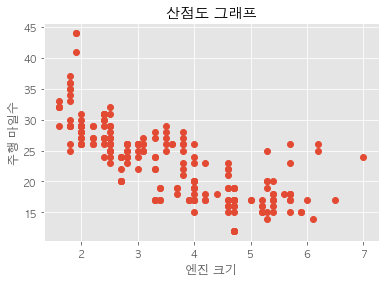

In [89]:
# draw plot
plt.figure()
plt.plot(x_data, y_data, marker = 'o', linestyle = 'None')
plt.ylabel('주행 마일수')
plt.xlabel('엔진 크기')
plt.title('산점도 그래프')
plt.grid(True)

##### 2. 구동 방식에 따른 색상 구분 O

In [81]:
labels = mpg['drv'].unique()
print(labels)
colors = ['r', 'g', 'b']
label_dict = {'f': '전륜 구동', '4' : '사륜 구동', 'r':'후륜 구동'}

['f' '4' 'r']


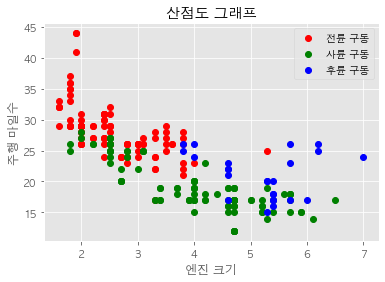

In [86]:
# draw plot
plt.figure()

idx = 0
for x in labels:
    x_data = mpg.loc[mpg['drv'] == x, 'displ']
    y_data = mpg.loc[mpg['drv'] == x, 'hwy']
    plt.plot(x_data, y_data, color = colors[idx], marker = 'o', linestyle = 'None', label = label_dict[x])
    idx +=1
    
plt.legend()
plt.title('산점도 그래프')
plt.xlabel('엔진 크기')
plt.ylabel('주행 마일수')
plt.grid(True)


#### 산점도와 히스토그램 동시에 그리기

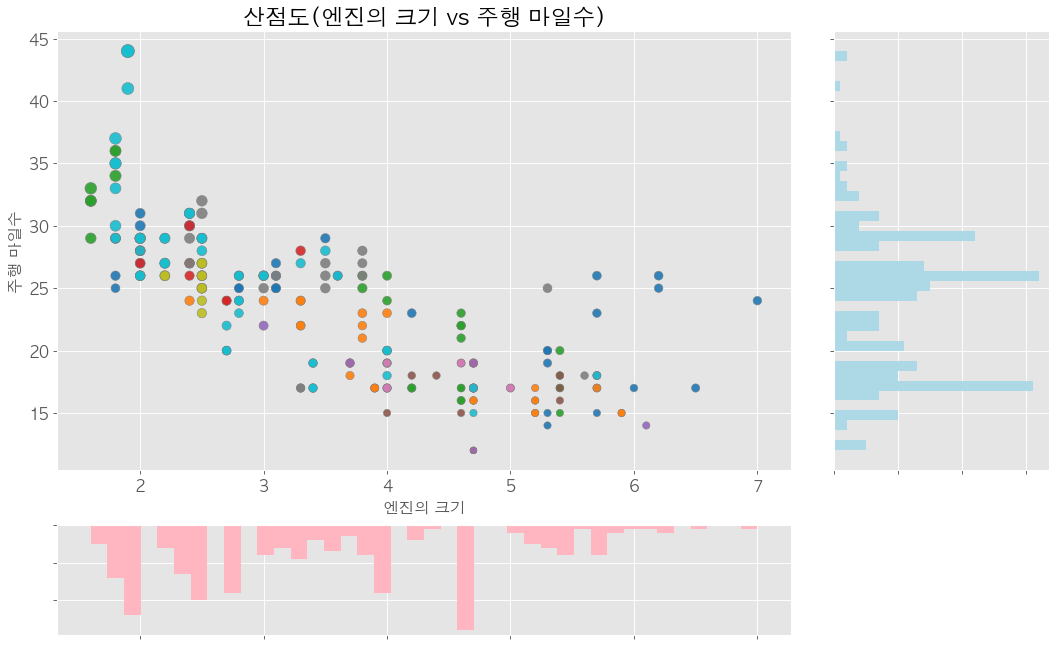

In [87]:
# fig 객체와 gridspec 객체를 정의
# gridspec 객체는 figure 객체 내에 서브 플로팅을 위한 grid 배치 관리자 역할

fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2) # 행과 열을 4x4로 공간을 나누겠다. - 총 16개의 그림

# 축을 정의합니다.
ax_main = fig.add_subplot(grid[:-1, :-1]) # scatter plot
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[]) # histogram
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[]) # histogram


# 메인 그래프에 산점도를 그립니다.
ax_main.scatter('displ', 'hwy', s=mpg.cty*4, c=mpg.manufacturer.astype('category').cat.codes, 
                alpha=.9, data=mpg, cmap="tab10", edgecolors='gray', linewidths=.5)

# 하단의 histogram, bin = 40
ax_bottom.hist(mpg.displ, 40, histtype='stepfilled', orientation='vertical', color='lightpink')
ax_bottom.invert_yaxis()

# 오른쪽 histogram
ax_right.hist(mpg.hwy, 40, histtype='stepfilled', orientation='horizontal', color='lightblue')


# Decorations
ax_main.set(title='산점도(엔진의 크기 vs 주행 마일수)', xlabel='엔진의 크기', ylabel='주행 마일수')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

#### 산점도의 크기와 색상을 지정하기

In [85]:
# data load
diamonds = pd.read_csv('../data/diamonds.csv')
print(diamonds)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [86]:
# data sampling
FRACTION = 0.005
diamonds = diamonds.sample(frac=FRACTION)

print(diamonds)
print(diamonds.columns)

       carat      cut color clarity  depth  table  price     x     y     z
19850   1.54  Premium     E     SI2   59.9   60.0   8408  7.49  7.38  4.46
20267   1.74  Premium     J     SI2   59.7   57.0   8690  7.88  7.80  4.68
22416   1.16    Ideal     F    VVS2   61.8   56.7  10439  6.70  6.78  4.16
22735   1.66    Ideal     E     SI2   62.7   56.0  10754  7.45  7.63  4.73
49046   0.51    Ideal     D     VS2   61.6   57.0   2056  5.19  5.14  3.18
...      ...      ...   ...     ...    ...    ...    ...   ...   ...   ...
6410    0.92  Premium     H     VS1   61.7   62.0   4039  6.20  6.12  3.80
41566   0.50  Premium     E     SI1   61.4   62.0   1238  5.10  5.07  3.12
30151   0.32  Premium     E     SI1   62.2   58.0    720  4.39  4.36  2.72
46868   0.53    Ideal     G     VS1   62.7   55.0   1813  5.18  5.16  3.24
41563   0.51     Fair     E     SI1   64.8   58.0   1237  5.07  5.02  3.27

[270 rows x 10 columns]
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 

In [88]:
# chart data
x_data = diamonds['price']
y_data = diamonds['depth']

# 원의 크기 : table에 따른 크기 구분
size = diamonds['table'] 
print(size.max())
print(size.min())

# 색깔 : cut에 따른 색깔 구분
colors = ['r', 'g', 'b', 'y', 'm']
cut_list = diamonds['cut'].unique()
print(cut_list)
color_dict = {cut_list[idx] : colors[idx] for idx in range(len(cut_list))}
print(color_dict)

68.0
53.0
['Premium' 'Ideal' 'Very Good' 'Fair' 'Good']
{'Premium': 'r', 'Ideal': 'g', 'Very Good': 'b', 'Fair': 'y', 'Good': 'm'}


In [92]:
# color, size 지정

def apply_color(cut):
    return color_dict[cut]

diamonds['new_cut'] = diamonds['cut'].apply(apply_color)
new_cut = diamonds['new_cut']


def apply_size(size):
    if size >=60:
        return 100
    elif size >=58:
        return 30
    elif size >= 54:
        return 5
    else:
        return 1

diamonds['new_table'] = diamonds['table'].apply(apply_size)
new_table = diamonds['new_table']

print(diamonds.head())

       carat      cut color clarity  depth  table  price     x     y     z  \
19850   1.54  Premium     E     SI2   59.9   60.0   8408  7.49  7.38  4.46   
20267   1.74  Premium     J     SI2   59.7   57.0   8690  7.88  7.80  4.68   
22416   1.16    Ideal     F    VVS2   61.8   56.7  10439  6.70  6.78  4.16   
22735   1.66    Ideal     E     SI2   62.7   56.0  10754  7.45  7.63  4.73   
49046   0.51    Ideal     D     VS2   61.6   57.0   2056  5.19  5.14  3.18   

      new_cut  new_table  
19850       r        100  
20267       r          5  
22416       g          5  
22735       g          5  
49046       g          5  


Text(0, 0.5, 'Depth')

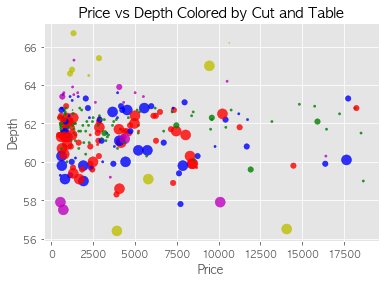

In [95]:
# chart draw
scatter_plot = plt.figure()
ax1 = scatter_plot.add_subplot(1, 1, 1)

ax1.scatter(x=x_data, y=y_data, s=new_table, c = new_cut, alpha = 0.8) # s : 도형의 크기, c : 색상 이름
ax1.set_title('Price vs Depth Colored by Cut and Table')
ax1.set_xlabel('Price')
ax1.set_ylabel('Depth')

### 3. 막대 그래프
- 수량의 많고 적음을 비교하고자 할 때

#### 일변량 막대 그래프 (범주형)

In [97]:
# data load
print(data1)

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512


In [99]:
# chart data
chart_data = data1['4월06일']
print(chart_data)

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64


In [143]:
# 함수를 이용하여 chart 짜기
def MakeBarChart01(x, y, color, xlabel, ylabel, title):
    plt.figure(figsize = (10, 8))
    plt.bar(x, y, color = color, alpha = 0.7)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
        
    # yticks
    YTICKS_INTERVAL = 50000
    maxlim = int(y.max() / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL # max
    print('max :', maxlim)
    values = np.arange(0, maxlim+1, YTICKS_INTERVAL)
    plt.yticks(values, ['%s'%format(val, ',') for val in values])
    
    # 그래프 위에 건수와 비율 구하기
    ratio = 100 * y / y.sum() # 비율
    print(ratio)
    
    plt.rc('font', size = 6)
    for idx in range(y.size):
        value = format(y[idx], ',') + '건' # ex. 60건
        ratioval = '%.1f%%'%(ratio[idx]) # ex. 20.0%
        plt.text(x=idx, y=y[idx]+1, s=value, horizontalalignment = 'center') # 그래프 위에 '건수' 표시
        plt.text(x=idx, y=y[idx]/2, s=ratioval, horizontalalignment = 'center') # 그래프 중간에 '비율' 표시
        
    # 평균선을 수직선으로 그리기    
    meanval = y.mean()
    print(meanval)
    
    average = '평균 : %d건'%meanval
    plt.axhline(y=meanval, color = 'r', linewidth = 1, linestyle = 'dashed')
    plt.text(x = y.size -1, y=meanval+200, s=average, horizontalalignment='center')
    

In [144]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
bar_color = colors[0:len(chart_data)]
print(bar_color)

['b', 'g', 'r', 'c', 'm', 'y', 'k']


max : 350000
국가
미국      34.069888
스페인     13.272496
이탈리아    13.093680
독일      10.156670
프랑스      7.156500
중국       8.296820
영국       4.854332
이란       5.912403
스위스      2.142949
한국       1.044261
Name: 4월06일, dtype: float64
98481.1


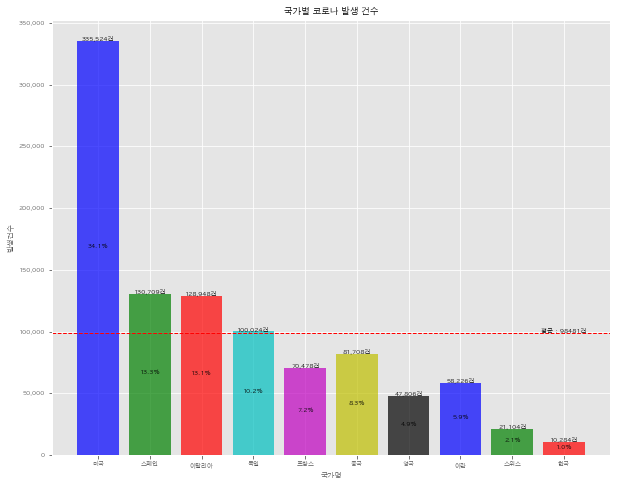

In [145]:
# draw
MakeBarChart01(x = chart_data.index, y = chart_data, color = bar_color, 
               xlabel = '국가명', ylabel='발생건수', title = '국가별 코로나 발생 건수')

#### 다변량 막대 그래프

In [4]:
# data load
print(data1)
print(data1.columns)

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')


In [5]:
COUNTRY = ['프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일']
data1_ = data1.loc[COUNTRY, WHEN]
data1_.index.name = '국가명'
data1_.columns.name = '일자'
print(data1_)

일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589


In [20]:
# 다변량 막대그래프 그리는 함수
def MakeBarChart02(chartdata, rotation, title, ylim = None, stacked = False, yticks_interval = 10000):
    plt.figure()
    # 범례에 제목을 넣기 위해서는 .plot()에서 legend 옵션을 사용해야 함
    # stacked = True :: 누적함수가 됨
    chartdata.plot(kind = 'bar', rot=rotation, title = title, legend=True, stacked = stacked)
    
    plt.legend(loc = 'best')
    
    print(chartdata)
    
    # 누적 막대 그래프 x
    if stacked == False:
        # max(chartdata.max()) : 항목 값 중에서 최대값을 의미
        maxlim = (int(max(chartdata.max())/yticks_interval)+1)*yticks_interval
        print('maxlim: ', maxlim)
        values = np.arange(0, maxlim+1, yticks_interval)
        plt.yticks(values, ['%s' %format(val, ',') for val in values])
    else: # 누적 막대 그래프 O
        # 국가별 누적 합인 chartdata.sum(axis=1)의 최대값에 대한 연산이 이루어져야 함
        maxlim = (int(max(chartdata.sum(axis=1))/yticks_interval)+1) *yticks_interval
        print('maxlim: ', maxlim)
        values = np.arange(0, maxlim+1, yticks_interval)
        plt.yticks(values, ['%s'%format(val, ',')for val in values])
    
    # y축의 상하한 값이 주어지는 경우에만 설정
    if ylim!=None:
        plt.ylim(ylim)
        

일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589
maxlim:  90000


<Figure size 432x288 with 0 Axes>

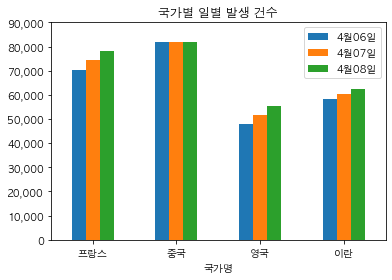

In [9]:
MakeBarChart02(chartdata = data1_, rotation = 0, title = '국가별 일별 발생 건수')

데이터를 전치시켜 다변량 그래프 그리기

In [10]:
# 데이터 전치
data1_T = data1_.T
print(data1_T)

국가명      프랑스     중국     영국     이란
일자                               
4월06일  70478  81708  47806  58226
4월07일  74390  81740  51608  60500
4월08일  78167  81802  55242  62589


국가명      프랑스     중국     영국     이란
일자                               
4월06일  70478  81708  47806  58226
4월07일  74390  81740  51608  60500
4월08일  78167  81802  55242  62589
maxlim:  90000


<Figure size 432x288 with 0 Axes>

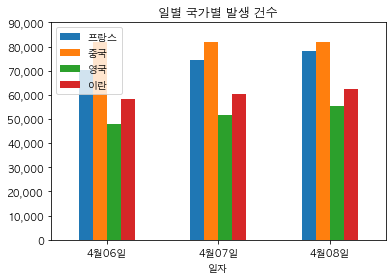

In [11]:
MakeBarChart02(chartdata =data1_T, rotation = 0, title = '일별 국가별 발생 건수')

#### 누적된 다변량 막대 그래프

In [12]:
# data
print(data1_)

일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589


In [15]:
ymax = data1_.sum(axis=1) # 각각 행별로 더함
ymaxlimit = ymax.max() + 10000 # 누적 막대 그래프를 그리기 위해

print(ymax)
print(ymaxlimit)

국가명
프랑스    223035
중국     245250
영국     154656
이란     181315
dtype: int64
255250


일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589
maxlim:  250000


<Figure size 432x288 with 0 Axes>

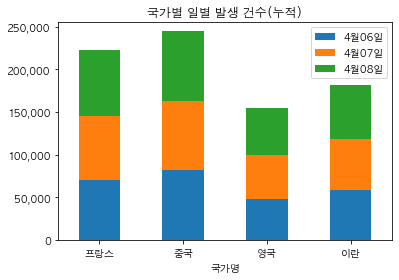

In [21]:
MakeBarChart02(chartdata=data1_, rotation = 0, title = '국가별 일별 발생 건수(누적)',
              ylim = [0, ymaxlimit], stacked=True, yticks_interval = 50000)

#### 서브 plot을 가진 막대 그래프 2개

In [28]:
# data load
print(data1)
# only_usa = [item for item in data1.index if item in ['미국']]
# print(only_usa)
only_usa_T = data1.loc[['미국']].T
print(only_usa_T)

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
국가         미국
4월06일  335524
4월07일  364723
4월08일  387547
4월09일  424945
4월10일  461437
4월11일  495535
4월12일  524903


In [30]:
# subplot barchart에 대한 함수
def MakeBarChart04(chartdata, suptitle):
    fig, axes = plt.subplots(nrows =2, ncols = 1) # 2행 1열
    
    chartdata.plot(kind='bar', ax=axes[0], rot = 0, alpha = 0.7)
    
    chartdata.plot(kind = 'barh', ax = axes[1], color = 'm', alpha = 0.7)
    
    fig.suptitle(suptitle)
    

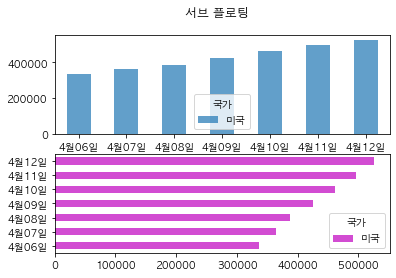

In [31]:
MakeBarChart04(chartdata=only_usa_T, suptitle = '서브 플로팅')

#### 막대 그래프를 보여주면서 엑셀의 표처럼 데이터의 내용을 보여주는 그래프
- python에서는 복잡하므로 생랼

### 파이그래프(원 그래프)
- 원 그래프는 전체에 대한 각 부분의 비율을 부채꼴 모양으로 나타낸 그래프
- 전체에 대한 비율을 한 눈에 알 수 있기 때문에 **비율**을 나타낼 때 편리
- 각 부채꼴의 중심각이 전체에서 차지하는 비율을 나타냄
- 경우에 따라서는 도넛 형태로 표기되기도 하며, 일부는 잘라서 살짝 밖으로 빼내어 보여주기도 함
- 각각의 항목들의 세부 정보는 보통 원 내붑에 표기, but 비율이 너무 낮을 경우에는 연결선을 따로 빼내어 표기

In [7]:
print(data1)

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512


In [6]:
# 나타내고자 하는 data
print(data1.columns)
print('-'*30)

my_concern = [item for item in data1.index if item in ['독일', '프랑스', '중국', '영국']]
print(my_concern)

pie_data = data1.loc[my_concern]
print(pie_data)
print('-'*30)

chartdata = pie_data['4월06일']

print(chartdata)
print('-'*30)

print(type(chartdata))
print('-'*30)

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')
------------------------------
['독일', '프랑스', '중국', '영국']
      4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                         
독일   100024  102453  107591  112113  118181  122171  124908
프랑스   70478   74390   78167   82048   86334   90276   93790
중국    81708   81740   81802   81865   81907   81953   82052
영국    47806   51608   55242   60733   65077   73758   78991
------------------------------
국가
독일     100024
프랑스     70478
중국      81708
영국      47806
Name: 4월06일, dtype: int64
------------------------------
<class 'pandas.core.series.Series'>
------------------------------


Index(['독일', '프랑스', '중국', '영국'], dtype='object', name='국가')
------------------------------
pieChart_01.png파일이 저장되었습니다.


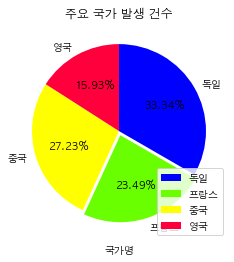

In [7]:
# pie chart의 label => 각 국가의 이름이 담긴 List
label = chartdata.index
print(label)
print('-'*30)

colors = ['blue', '#6AFF00', 'yellow', '#FF003C']
# %%
plt.figure()

# shadow = Pie chart에 그림자가 지게 하도록 하는 파라미터
# explode : 2번째 값이 밖으로 빠지게 하는 파라미터
# autopct : 소수점 둘째짜리 까지 %로 명시하겠다는 파라미터
# startangle : 90도부터가 시작이다
# counterclock = False : 90도를 기준으로 시계방향으로 pie 그리기
plt.pie(chartdata, labels=label, shadow=False, explode=(0, 0.05, 0, 0),
       colors = colors, autopct='%1.2f%%', startangle = 90, counterclock=False)

plt.grid(True)
plt.legend(loc=4) # loc =4 : lower right
plt.xlabel('국가명')
plt.title('주요 국가 발생 건수')

cnt+=1 # cnt : 그림 번호
CHART_NAME = 'pieChart'
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + '파일이 저장되었습니다.')

#### pie chart의 legend의 위치를 임의의 위치에 배치하는 방법
- getLabelFormat() 함수는 전체 비율을 소수점 둘째 자리수까지 표현, 몇 명인지를 표현

pieChart_04.png파일이 저장되었습니다.


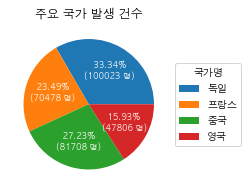

In [17]:
# fig는 저장할 때 필요
# ax는 실제 chart를 그릴 때 필요한 인수 - 축
# figsize = (가로 6inch, 세로 3inch)
# dict(aspect="equal") : 실제 데이터의 x, y 비율을 동일하게 설정한다
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw = dict(aspect="equal"))

def getLabelFormat(pct, allvals):
    absolute = int(pct/100*np.sum(allvals)) # 인원이 나옴 - 데이터를 그대로 읽어도 됨
    return "{: .2f}%\n ({:d} 명)".format(pct, absolute)

# autopct를 lambda 함수를 이용
wedges, texts, autotexts = ax.pie(chartdata, autopct=lambda pct: getLabelFormat(pct, chartdata),
                                 textprops = dict(color="w")) # 글씨 색상을 white

# center left 점을 기준으로 x축으로 1, y축으로 0, bbox_to_anchor = (x, y, width, height)
ax.legend(wedges, label, title = "국가명", loc = "center left", bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight = "bold")

ax.set_title("주요 국가 발생 건수")

cnt+=1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')

#### pie chart- 도넛 모양
- 내부의 도넛 구멍 크기는 wedgeprops의 매개변수를 사용

[100024  70478  81708  47806 128948]
------------------------------
ang :  1.9716331362724304
ang :  73.5169380903244
ang :  137.37656354904175
ang :  191.7226618528366
ang :  265.8914005756378
pieChart_05.png파일이 저장되었습니다.


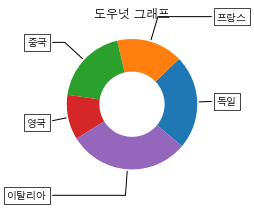

In [26]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw = dict(aspect="equal"))

COUNTRY = ['독일', '프랑스', '중국', '영국', '이탈리아']
pie_data = data1.loc[COUNTRY, ['4월06일']]
print(pie_data.values.flatten()) # 값을 펼쳐서 배열로 만드는 과정
print('-'*30)

# wedgeprops = dict(width = 0.9)라면 가운데에 반지름이 0.1인 빈 공간이 생김
wedges, texts = ax.pie(pie_data.values.flatten(), wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    print('ang : ', ang)
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))

    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]

    connectionstyle = "angle,angleA=0,angleB={}".format(ang)

    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    ax.annotate(COUNTRY[i], xy=(x, y), xytext=(1.3*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)


ax.set_title("도우넛 그래프")

cnt+=1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi = 400)
print(savefile + '파일이 저장되었습니다.')

#### 중첩된 pie graph

In [39]:
# data

print(data1)
print('-'*30)

COUNTRY = ['독일', '프랑스', '중국', '영국', '이탈리아']
my_concern = [item for item in data1.index if item in COUNTRY]
print(my_concern)

pie_data = data1.loc[my_concern]

filtered_data = pie_data[['4월06일', '4월07일']]

print(filtered_data)
print('-'*30)

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
------------------------------
['이탈리아', '독일', '프랑스', '중국', '영국']
       4월06일   4월07일
국가                  
이탈리아  128948  132547
독일    100024  102453
프랑스    70478   74390
중국     81708   81740
영국     47806   51608
------------------------------


In [40]:
# 차트를 그릴 중첩 데이터
totallist = []
for key in filtered_data.index.values :
       imsi = filtered_data.loc[key].values
       totallist.append([item for item in imsi])
chartdata = np.array(totallist)
print('chartdata : \n', chartdata)


# 색상의 개수
color_su = len(COUNTRY)
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(color_su)*4)
inner_colors = cmap(np.arange(2*color_su))
print('inner_colors :', inner_colors)
print('outer_colors :', outer_colors)


# 누적 개수
cum_sum = chartdata.sum(axis=1)
print('cum_sum: ', cum_sum)

chartdata : 
 [[128948 132547]
 [100024 102453]
 [ 70478  74390]
 [ 81708  81740]
 [ 47806  51608]]
inner_colors : [[0.19215686 0.50980392 0.74117647 1.        ]
 [0.41960784 0.68235294 0.83921569 1.        ]
 [0.61960784 0.79215686 0.88235294 1.        ]
 [0.77647059 0.85882353 0.9372549  1.        ]
 [0.90196078 0.33333333 0.05098039 1.        ]
 [0.99215686 0.55294118 0.23529412 1.        ]
 [0.99215686 0.68235294 0.41960784 1.        ]
 [0.99215686 0.81568627 0.63529412 1.        ]
 [0.19215686 0.63921569 0.32941176 1.        ]
 [0.45490196 0.76862745 0.4627451  1.        ]]
outer_colors : [[0.19215686 0.50980392 0.74117647 1.        ]
 [0.90196078 0.33333333 0.05098039 1.        ]
 [0.19215686 0.63921569 0.32941176 1.        ]
 [0.45882353 0.41960784 0.69411765 1.        ]
 [0.38823529 0.38823529 0.38823529 1.        ]]
cum_sum:  [261495 202477 144868 163448  99414]


pieChart_11.png 파일이 저장되었습니다.


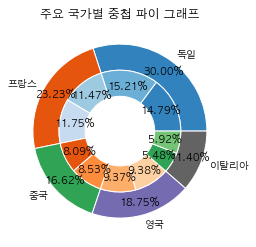

In [42]:
# draw pie chart
fig, ax = plt.subplots()

# 숫자가 적을 수록 가운데 비어있는 원이 커짐
INNER_VACANT_CIRCLE_SIZE = 0.3

# 비율을 보여주는 위치 - 원점에서의 거리
OUTER_PCTDISTANCE = 0.85

# edgecolor='w', 'None'
ax.pie(cum_sum, radius=1, colors=outer_colors,
       wedgeprops=dict(width=INNER_VACANT_CIRCLE_SIZE, edgecolor='w'),
       labels=COUNTRY, autopct='%.2f%%', pctdistance=OUTER_PCTDISTANCE)

INNER_PCTDISTANCE = 0.75

ax.pie(chartdata.flatten(), radius=1-INNER_VACANT_CIRCLE_SIZE, colors=inner_colors,
       wedgeprops=dict(width=INNER_VACANT_CIRCLE_SIZE, edgecolor='w'),
       autopct='%.2f%%', pctdistance=INNER_PCTDISTANCE)

ax.set(aspect="equal", title='주요 국가별 중첩 파이 그래프')

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
# plt.legend(loc='best')
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

#### pie의 한 부분인 특정 국가에 대한 정보를 세분화 시켜, 관심 일자에 대한 비율 정보를 별도로 그리기
- pie chart & bar chart
- 두 개의 그래프를 from matplotlib.patches import ConnectionPatch 를 사용해서 연결했다!!

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512
------------------------------
my_concern :  ['독일', '프랑스', '중국']
------------------------------
filtered_data : 
       4월06일   4월07일   4월08일
국가                         
독일   100024  102453  107591
프랑스   70478   74390   78167
중국    81708   81740   81802
--------------

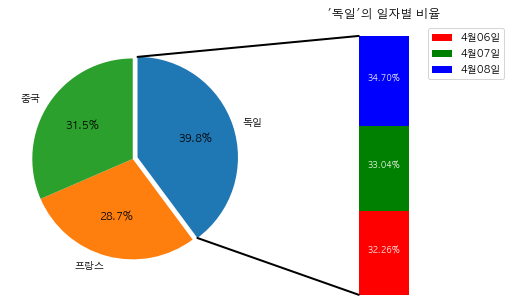

pieChart_13.png 파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

In [50]:
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# data
data = data1
print(data)
print('-'*30)

COUNTRY = ['독일', '프랑스', '중국'] # 관심 국가 목록
my_concern = [item for item in data.index if item in COUNTRY]
print('my_concern : ', my_concern)
print('-'*30)
data = data.loc[my_concern]

when = ['4월06일', '4월07일', '4월08일'] # 관심 일자 목록
filtered_data = data[when] # 파이 차트에 그려질 데이터
print('filtered_data : \n', filtered_data)
print('-'*30)


pieData = filtered_data.sum(axis=1).values # 국가별 총합
barData = filtered_data.loc['독일'].values
barData = barData/sum(barData)
print('pieData : ', pieData)
print('-'*30)
print('barData : ', barData)
print('-'*30)


# pie chart 관련 변수 리스트
explode = [0 for idx in range(len(pieData))]
explode[0] = 0.05
print('explode : ', explode)
print('-'*30)

# rotate so that first wedge is split by the x-axis
# 막대 그래프를 우측에 그릴 것이므로, 시작 각도는 90도로 지정하고 counterclock=False의 값으로 지정하면 좋습니다.
STARTANGLE = 90
print('STARTANGLE : ', STARTANGLE)
print('-'*30)
ax1.pie(pieData, autopct='%1.1f%%', startangle=STARTANGLE,
        labels=COUNTRY, explode=explode, counterclock=False)

# bar chart 관련 변수
xpos = 0
bottom = 0
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7]]
colors = ['r', 'g', 'b']

for j in range(len(barData)):
    height = barData[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%.2f%%" % (ax2.patches[j].get_height() * 100),
             ha='center', fontsize=8, color='w')

ax2.set_title("'" + COUNTRY[0] + "'의 일자별 비율")
ax2.legend((when))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)


# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

LINE_WIDTH = 2 # 연결선의 두께


from matplotlib.patches import ConnectionPatch

# 상단의 연결선
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(LINE_WIDTH)
ax2.add_artist(con)

# 하단의 연결선
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(LINE_WIDTH)

plt.show()

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
# plt.legend(loc='best')
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')
########

### 상자 수염 그래프(box plot)
- 다섯 숫자 요약으로 그린, 자료의 특성을 요약하는 그래프
- upper whisker : 최대값 (IQR * 1.5 내부의 최대값)
- lower whisker : 최소값 (IQR * 1.5 내부의 최소값)
- 제3사분위수 : 75% (Q3)
- 중앙값 : median(50%)
- 제1사분위수 : 25% (Q1)
- IQR : Q3 - Q1
- oulier : 이상치 - upper whisker, lower whisker 이외의 값

In [53]:
# tip.csv 파일은 data3으로 정의되어짐
print(data3)

     Unnamed: 0  total_bill   tip     sex smoker   day    time  size
0             0       16.99  1.01  Female     No   Sun  Dinner     2
1             1       10.34  1.66    Male     No   Sun  Dinner     3
2             2       21.01  3.50    Male     No   Sun  Dinner     3
3             3       23.68  3.31    Male     No   Sun  Dinner     2
4             4       24.59  3.61  Female     No   Sun  Dinner     4
..          ...         ...   ...     ...    ...   ...     ...   ...
239         239       29.03  5.92    Male     No   Sat  Dinner     3
240         240       27.18  2.00  Female    Yes   Sat  Dinner     2
241         241       22.67  2.00    Male    Yes   Sat  Dinner     2
242         242       17.82  1.75    Male     No   Sat  Dinner     2
243         243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 8 columns]


####  dinner와 lunch에 대한 boxplot - rectangular, notch

In [58]:
import matplotlib

plt.rc('font', family = 'AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'boxPlot'

In [56]:
# tip.csv파일은 data3에 정의되어 있음
print(data3)
DINNER, LUNCH = 'Dinner', 'Lunch'

frame01 = data3.loc[data3['time'] == DINNER, 'total_bill']
frame01.index.name = DINNER

frame02 = data3.loc[data3['time'] == LUNCH, 'total_bill']
frame02.index.name = LUNCH

chartdata = [np.array(frame01), np.array(frame02)]
print('chartdata')
print(chartdata)

     Unnamed: 0  total_bill   tip     sex smoker   day    time  size
0             0       16.99  1.01  Female     No   Sun  Dinner     2
1             1       10.34  1.66    Male     No   Sun  Dinner     3
2             2       21.01  3.50    Male     No   Sun  Dinner     3
3             3       23.68  3.31    Male     No   Sun  Dinner     2
4             4       24.59  3.61  Female     No   Sun  Dinner     4
..          ...         ...   ...     ...    ...   ...     ...   ...
239         239       29.03  5.92    Male     No   Sat  Dinner     3
240         240       27.18  2.00  Female    Yes   Sat  Dinner     2
241         241       22.67  2.00    Male    Yes   Sat  Dinner     2
242         242       17.82  1.75    Male     No   Sat  Dinner     2
243         243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 8 columns]
chartdata
[array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.2

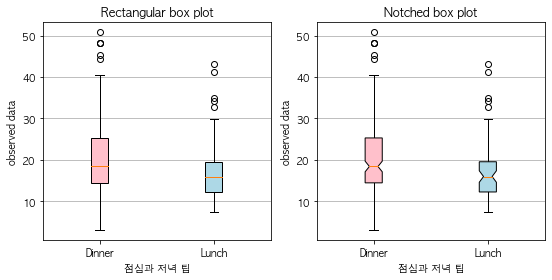

boxPlot_01.png 파일이 저장되었습니다.
finished


<Figure size 432x288 with 0 Axes>

In [57]:
# x 축을 위한 레이블
xtick_label = [DINNER, LUNCH] 

# 행의 개수는 1, 열의 개수는 2 - 축은 ax1, ax2
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot - notch=Fasle
bplot1 = ax1.boxplot(chartdata,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=xtick_label)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(chartdata,
                     notch=True,  # notch shape :: 홈이 패인 plot
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=xtick_label)  # will be used to label x-ticks
ax2.set_title('Notched box plot')


# fill with colors
colors = ['pink', 'lightblue']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors): # dinner, lunch에 대한 Plot
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('점심과 저녁 팁')
    ax.set_ylabel('observed data')
    
    
plt.show()

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

print('finished')

####  boxplot - violin, box

boxPlotVsViolon_01.png 파일이 저장되었습니다.


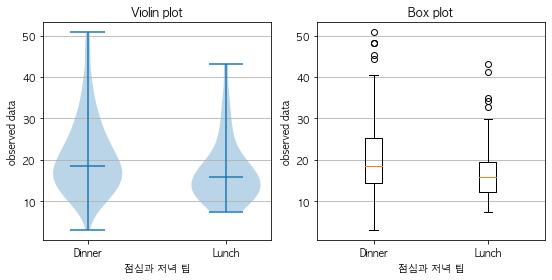

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# plot violin plot
axs[0].violinplot(chartdata,
                  showmeans=False, # 평균값이 가로줄로 들어가지 않게끔
                  showmedians=True) # 중간값이 가로줄로 들어가게끔
axs[0].set_title('Violin plot')

axs[1].boxplot(chartdata) # plot box plot
axs[1].set_title('Box plot')


# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(chartdata))])
    ax.set_xlabel('점심과 저녁 팁')
    ax.set_ylabel('observed data')

# add x-tick labels
plt.setp(axs, xticks=[y + 1 for y in range(len(chartdata))],
         xticklabels=[DINNER, LUNCH])



cnt += 1
savefile = 'boxPlotVsViolon' + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

### 히스토그램
- 특정 데이터의 빈도 수를 막대 모양으로 표시한 그래프
- 데이터의 특성/분포를 파악하는 역할
- 가로축 : 계급, 세로축 : 빈도수나 비율
- matplotlib.pyplot.hist(x, bins = None ...)
    - x : 배열
    - bins : 계급의 개수
    - alpha : 막대 색상의 불투명도
    - facecolor : 막대에 채워질 색상
    - label : 범례에 보여질 문장렬
    - rwidth : 계급 너비의 부분값 (0~1.0 사이의 값)

In [60]:
plt.rc('font', family='AppleGothic')
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'histogram'
humanfile = '../data/human_height.csv'
plt.rcParams['axes.unicode_minus'] = False

In [62]:
# data
num_bins = 50
human = pd.read_csv(humanfile, encoding='utf-8')
print(human)

man = human['man']
woman = human['woman']
print(man.describe())

          giant       dwarf         man       woman
0    238.546060  124.103335  179.916746  159.490128
1    252.392501  137.276266  177.416055  172.558434
2    240.544939  130.792817  182.664450  145.299985
3    261.237121  132.296450  175.602169  159.458091
4    255.259860  133.228272  178.859996  163.211875
..          ...         ...         ...         ...
995  248.682492  134.647524  179.517798  165.736301
996  263.363421  116.168449  166.447602  154.842039
997  234.220693  114.580477  185.995531  162.115534
998  257.068424  136.411198  177.157406  157.741702
999  239.300300  146.445107  172.141760  157.686667

[1000 rows x 4 columns]
count    1000.000000
mean      180.016269
std        10.048471
min       140.185975
25%       173.108048
50%       180.149555
75%       186.748961
max       210.344273
Name: man, dtype: float64


#### 남자들의 키에 대한 정보를 저장하고 있는 히스토그램 그리기 
- 히스토그램을 위한 계급의 개수는 50개로 지정
    - bins = 50

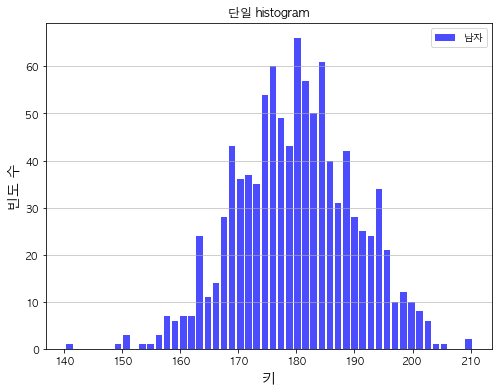

histogram_02.png 파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

In [64]:
# histogram 그리기
plt.figure(figsize=(8, 6))
# rwidth = 0.8 : 구간과 구간 사이의 간격이 보임
plt.hist(man, bins=num_bins, alpha=0.7, facecolor='blue', label="남자", rwidth=0.8)


plt.xlabel("키", size=14)
plt.ylabel("빈도 수", size=14)
plt.title("단일 histogram")
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)
plt.show()

cnt = cnt + 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

#### 남자와 여자에 대한 histogram을 함께 그리기

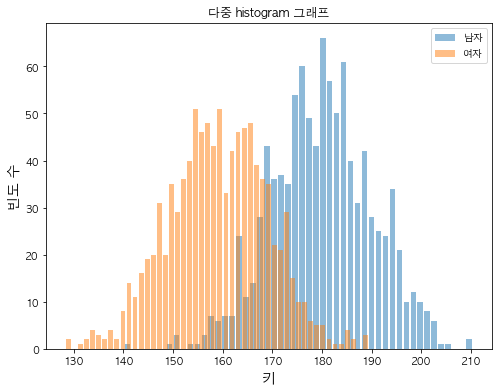

histogram_04.png 파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

In [66]:
plt.figure(figsize=(8, 6))
# rwidth : default = 1
plt.hist(man, bins=num_bins, alpha=0.5, label="남자", rwidth = 0.8)
plt.hist(woman, bins=num_bins, alpha=0.5, label="여자", rwidth = 0.8)

plt.xlabel("키", size=14)
plt.ylabel("빈도 수", size=14)
plt.title("다중 histogram 그래프")
plt.legend(loc='upper right')
plt.show()

cnt = cnt + 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

#### 히스토그램과 함께 커널밀도 함수를 그리기

<class 'pandas.core.series.Series'>
mu : 19.785942622950824
sigma : 8.902411954856856
histogram_01.png 파일이 저장되었습니다.


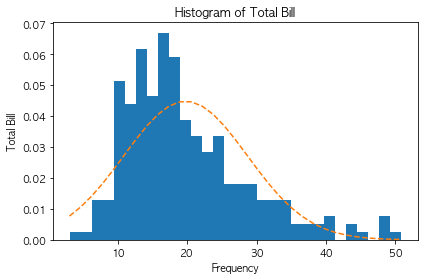

In [72]:
# import & setting
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'histogram'
filename = '../data/tips.csv'
plt.rcParams['axes.unicode_minus'] = False
num_bins = 30 # bin의 개수


# data
tips = pd.read_csv(filename, encoding='utf-8')

x = tips['total_bill'] # Series
print(type(x))
# print('x')
# print(x)
# print('-'*30)


# 히스토그램 그리기
fig, ax = plt.subplots()

# the histogram of the data
## density = True : 각 구간별로 count / sum(count)*np.diff(bins) => 전체 합 : 1
n, bins, patches = ax.hist(x, num_bins, density=True)

ax.set_title('Histogram of Total Bill')
ax.set_xlabel('Frequency')
ax.set_ylabel('Total Bill')


# 커널 밀도 함수 만들기 - 정규분포
import numpy as np

mu = x.mean()  # 평균
print('mu :', mu)

sigma = x.std() # 표준 편차
print('sigma :', sigma)

# 정규 분포 값
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--') # bins = bin edge

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()


cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

#### 히스토그램의 계급 구간의 개수 / 최소,최대값 조정하기

histogram_03.png 파일이 저장되었습니다.


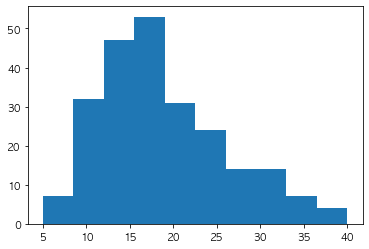

In [74]:
# 만약 최소값/최대값을 바꾸거나 계급 구간의 개수를 늘리고 싶다면 range와 bins를 통해 직접 설정할 수 있다.
fig, ax = plt.subplots()
plt.hist(x, range=(5, 40), bins=10) # range : x축의 구간, bins 바꾸면서 조정 가능


cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

#### 거인국과 소인국 사람들의 정보를 담고 있는 파일을 이용하여 히스토그램 그리기


#별개의 데이터에 대한 histogram 서브 플로팅
histogram_04.png 파일이 저장되었습니다.


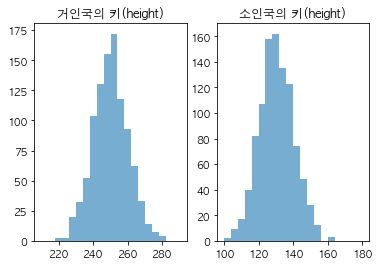

In [75]:
# data
humanfile = '../data/human_height.csv'
human = pd.read_csv(humanfile, encoding='utf-8')
giant = human['giant']
dwarf = human['dwarf']

# draw plot
print('\n#별개의 데이터에 대한 histogram 서브 플로팅')
fig, axes = plt.subplots(nrows=1, ncols=2) # 1행 2열의 그래프

#range : x축의 범위
axes[0].hist(giant, range=(210, 290), bins=20, alpha=0.6)
axes[1].hist(dwarf, range=(100, 180), bins=20, alpha=0.6)

axes[0].set_title('거인국의 키(height)')
axes[1].set_title('소인국의 키(height)')


cnt = cnt + 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

#### 2개를 같은 fig 안에서 그리기


#2개의 histogram 같이 그리기
histogram_05.png 파일이 저장되었습니다.


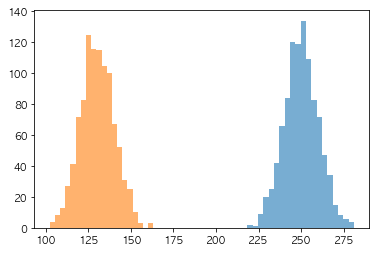

In [76]:
print('\n#2개의 histogram 같이 그리기')
fig, axes = plt.subplots()

# 같은 축을 공유하는 histogram
axes.hist(giant, bins=20, alpha=0.6)
axes.hist(dwarf, bins=20, alpha=0.6)

cnt = cnt + 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

#### 누적 히스토그램


#stack histogram 그리기
[[179.9167455 159.490128 ]
 [177.4160548 172.5584341]
 [182.6644495 145.2999849]
 ...
 [185.9955305 162.1155336]
 [177.1574061 157.7417022]
 [172.1417596 157.6866666]]
(1000, 2)
histogram_06.png 파일이 저장되었습니다.


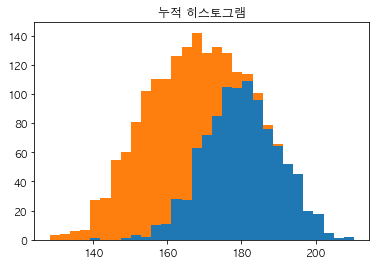

In [77]:
print('\n#stack histogram 그리기')
fig, axes = plt.subplots()

# data
man = human['man']
woman = human['woman']
x = np.array([man, woman]).T
print(x)
print(x.shape) # (1000, 2)

# draw - stacked = True :: 겹쳐지게 그리는 것을 허용함
axes.hist(x, bins=num_bins, density=False, histtype='bar', stacked=True)
axes.set_title('누적 히스토그램')

cnt = cnt + 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')